In [1]:
import os
import IPython.display as display
from bson import ObjectId
from gridfs import GridFS
from pymongo import MongoClient
from ajna_commons.flask.conf import DATABASE, MONGODB_URI
from ajna_commons.utils.images import get_imagens_recortadas

2019-03-13 11:03:57,068 ajna         INFO     Configuração de log efetuada


Fazendo log de erros e alertas no arquivo  /home/ivan/pybr/ajna/padma/ajna_commons/flask/error.log
Fazendo log de atividade no arquivo  /home/ivan/pybr/ajna/padma/ajna_commons/flask/access.log


In [2]:
TEMNCM = {'metadata.contentType': 'image/jpeg',
          'metadata.carga.ncm': {'$exists': True}}
def get_cursor_filtrado(db, filtro, limit=None):
    cursor = db['fs.files'].find(filtro)
    if limit:
        cursor.limit(limit)
    return cursor
db = MongoClient(host=MONGODB_URI)[DATABASE]
cursor = get_cursor_filtrado(db, filtro=TEMNCM, limit=10)

In [3]:
grid_fs = next(cursor)
fs = GridFS(db)
_id = ObjectId(grid_fs['_id'])
if fs.exists(_id):
    grid_out = fs.get(_id)
    image = grid_out.read()
    
imgs = get_imagens_recortadas(db, _id)
print(imgs)

[<PIL.Image.Image image mode=RGB size=441x192 at 0x7F7B6D8607B8>]


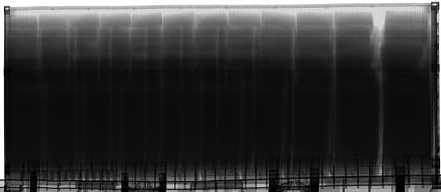

In [4]:
pil_image = imgs[0]
display.display(pil_image)

In [11]:
cursor = db['Tags'].find()
tags = list(cursor)
print(tags)

[]


In [12]:
if len(tags) == 0:
    print('Criar Banco Tags!')
    

Criar Banco Tags!


In [16]:
dict_tags = {
    '0': ' Selecione tag desejada',
    '1': 'Cocaína',
    '2': 'Armas',
    '3': 'Auditando',
    '4': 'Seleção de Risco',
    '5': 'Erro de predição - detecção contêiner',
    '6': 'Erro de predição - vazio',
    '7': 'Erro de predição - peso',
    '8': 'Erro de predição - outro'
}
mongo_records = []
for id, descricao in dict_tags.items():
    mongo_records.append({'id': id,
                         'descricao': descricao})
    db['Tags'].insert_one({'id': id,
                         'descricao': descricao})   



/home/ivan/pybr/ajna/padma/padma-venv/lib/python3.5/site-packages/ipykernel_launcher.py:17: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


In [17]:
cursor = db['Tags'].find()
tags = list(cursor)
print(tags)

[{'descricao': 'Seleção de Risco', '_id': ObjectId('5c890f971004b31cb6375314'), 'id': '4'}, {'descricao': 'Erro de predição - peso', '_id': ObjectId('5c890f981004b31cb6375315'), 'id': '7'}, {'descricao': 'Erro de predição - detecção contêiner', '_id': ObjectId('5c890f981004b31cb6375316'), 'id': '5'}, {'descricao': 'Armas', '_id': ObjectId('5c890f981004b31cb6375317'), 'id': '2'}, {'descricao': ' Selecione tag desejada', '_id': ObjectId('5c890f981004b31cb6375318'), 'id': '0'}, {'descricao': 'Erro de predição - outro', '_id': ObjectId('5c890f981004b31cb6375319'), 'id': '8'}, {'descricao': 'Auditando', '_id': ObjectId('5c890f981004b31cb637531a'), 'id': '3'}, {'descricao': 'Erro de predição - vazio', '_id': ObjectId('5c890f981004b31cb637531b'), 'id': '6'}, {'descricao': 'Cocaína', '_id': ObjectId('5c890f981004b31cb637531c'), 'id': '1'}]


In [19]:
for row in tags:
    print(row['id'], row['descricao'])

4 Seleção de Risco
7 Erro de predição - peso
5 Erro de predição - detecção contêiner
2 Armas
0  Selecione tag desejada
8 Erro de predição - outro
3 Auditando
6 Erro de predição - vazio
1 Cocaína
